# Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Target variable is survived is int value it means dead or alive this is the binary classification model

In [7]:
df.shape

(891, 12)

#  891 rows and 12 column present in this data

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#  there are 891 rows present in data and cabin missing value is 687 so we drop this column

In [9]:
df.drop(columns='Cabin',axis=1,inplace=True)

#  filling null values

In [10]:
df['Age']=df['Age'].fillna(value=df['Age'].mean())
df['Embarked'] =df['Embarked'].fillna(method='bfill')

In [11]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
for i in df.columns:
    print(df[i].value_counts())

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500

#  we delete  PassengerId , name tickit  this is the unique value to each passengers 

In [13]:
df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#  EDA

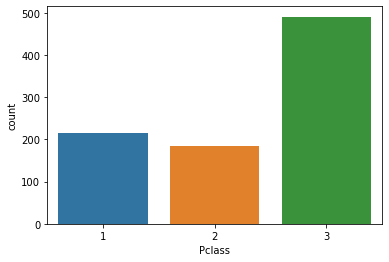

In [16]:
sns.countplot(x='Pclass', data=df )
plt.show()

# 
 most of people travel to third pclass as compared to 1st pclass or 2 pclass

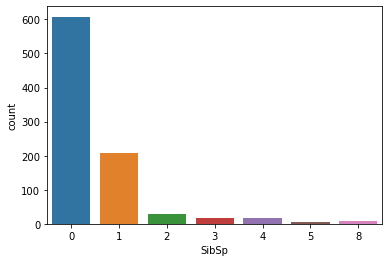

In [17]:
sns.countplot(x='SibSp', data=df )
plt.show()

#  There are most of no sibling travel in titanic

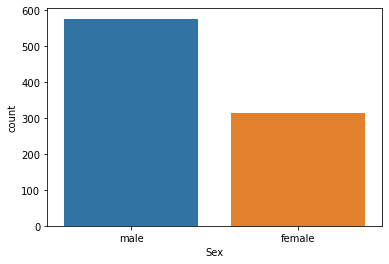

In [18]:
sns.countplot(x='Sex', data=df )
plt.show()

#  In this dataset there are male travelor more as compared to female travelor

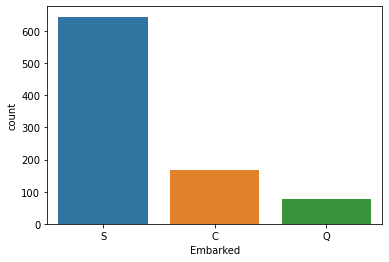

In [19]:
sns.countplot(x='Embarked', data=df )
plt.show()    

#  Most of people Southampton embarked in the dataset

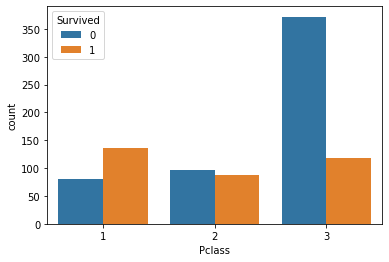

In [20]:
sns.countplot(x='Pclass', data=df, hue='Survived' )
plt.show()

#  1 pclass is high survival rate as compared to others

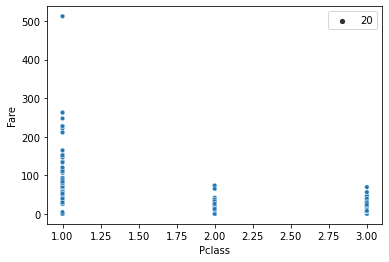

In [21]:
sns.scatterplot(x='Pclass',y='Fare', data=df,size=20)
plt.show()

# 
2 pclass and 3 pclass is fare vlaue almost similar thatswhy people choose this pclass 
and 1 pclass is fare value is to high so most of people avoid thos pclass

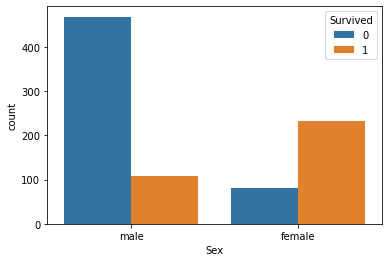

In [22]:
sns.countplot(x='Sex', data=df, hue='Survived' )
plt.show()

#  Females have a higher survival rate compared to males. 

<AxesSubplot:xlabel='Age', ylabel='Density'>

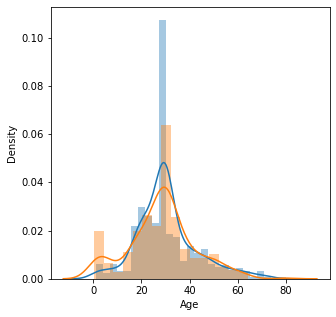

In [23]:
plt.figure(figsize=(5,5))
sns.distplot(df['Age'][df['Survived']==0])
sns.distplot(df['Age'][df['Survived']==1])

#  
The survival rate tends to be higher for individuals at a younger age.

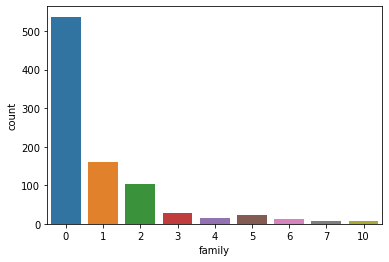

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64


In [32]:

df['family']=df['SibSp'] +df['Parch']
sns.countplot(x='family',data=df)
plt.show()
print(df['family'].value_counts())


# Most of people are solo travelor in the dataset
lets check who's have more survival if they have family 

In [33]:
df.groupby(['family'])['Survived'].mean()


family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [34]:
df.drop(columns='family',inplace=True)

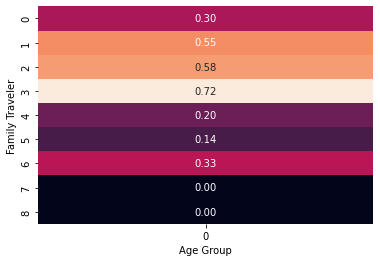

In [35]:
data = {
    1: 0.303538,
    2: 0.552795,
    3: 0.578431,
    4: 0.724138,
    5: 0.200000,
    6: 0.136364,
    7: 0.333333,
    8: 0.000000,
    11: 0.000000
}

matrix = [[data.get(i+1, 0)] for i in range(len(data))]


sns.heatmap(matrix, annot=True, fmt=".2f", cbar=False)

plt.xlabel('Age Group')
plt.ylabel('Family Traveler')

plt.show()


#  this have family member 1 to 4 this has a high survival rate as compered to more than above 4 family member

In [36]:
categorial_data=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorial_data.append(i)
numerical_data=[]
for i in df.dtypes.index:
    if df.dtypes[i] !='object':
        numerical_data.append(i)

In [37]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [38]:
from scipy.stats import zscore
outliers= df[['Pclass','SibSp','Parch','Fare']]
z=np.abs(zscore(outliers))
z

,Pclass,SibSp,Parch,Fare
0,0.827377,0.432793,0.473674,0.502445
1,1.566107,0.432793,0.473674,0.786845
2,0.827377,0.474545,0.473674,0.488854
3,1.566107,0.432793,0.473674,0.420730
4,0.827377,0.474545,0.473674,0.486337
...,...,...,...,...
886,0.369365,0.474545,0.473674,0.386671
887,1.566107,0.474545,0.473674,0.044381
888,0.827377,0.432793,2.008933,0.176263
889,1.566107,0.474545,0.473674,0.044381


In [39]:
np.where(z<3)

(array([  0,   0,   0, ..., 890, 890, 890], dtype=int64),
 array([0, 1, 2, ..., 1, 2, 3], dtype=int64))

In [40]:
df=df[(z<3).all(axis=1)]
df.shape

(827, 8)

#  There are 64 outliers in data so we use z score

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

df['Sex']=label_encoder.fit_transform(df['Sex'])
df['Embarked']=label_encoder.fit_transform(df['Embarked'])

In [42]:
df['Survived'].value_counts()

0    506
1    321
Name: Survived, dtype: int64

#  There are data imbalanced we fix this this data imbalanced promble

In [43]:
x=df.drop(columns='Survived')
y=df['Survived']

In [44]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [45]:
y.value_counts()

0    506
1    506
Name: Survived, dtype: int64

#  now we can build a model

#  The target variable is survived or not it means there is binary classification model

In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

,vif,features
0,2.167408,Pclass
1,1.139411,Sex
2,1.282485,Age
3,1.161817,SibSp
4,1.258297,Parch
5,2.300544,Fare
6,1.095989,Embarked


#  VIF value is gretar than 5 we can remove this column but in this project we don't remove any column

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRs = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=i)
    rnd = RandomForestClassifier()
    rnd.fit(x_train, y_train)
    y_pred = rnd.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.8717105263157895 at random_state 47


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRs)

In [50]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report ,confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [51]:
LR=LogisticRegression()
LR.fit(x_train, y_train)
predLR= LR.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predLR)))
print('\n')
print(confusion_matrix(y_test, predLR))

Accuracy score 0.8223684210526315


[[131  21]
 [ 33 119]]


In [52]:
Rnd= RandomForestClassifier()
Rnd.fit(x_train, y_train)
predRnd= Rnd.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predRnd)))
print('\n')
print(confusion_matrix(y_test, predRnd))

Accuracy score 0.875


[[134  18]
 [ 20 132]]


In [53]:
Etr= ExtraTreesClassifier()
Etr.fit(x_train, y_train)
predEtr= Etr.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predEtr)))
print('\n')
print(confusion_matrix(y_test, predEtr))

Accuracy score 0.8388157894736842


[[123  29]
 [ 20 132]]


In [54]:
svc=SVC()
svc.fit(x_train, y_train)
predsvc=svc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predsvc)))
print('\n')

print(confusion_matrix(y_test, predsvc))

Accuracy score 0.7072368421052632


[[131  21]
 [ 68  84]]


In [55]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)
predgbc =gbc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predgbc)))
print('\n')

print(confusion_matrix(y_test, predgbc))

Accuracy score 0.8519736842105263


[[137  15]
 [ 30 122]]


In [56]:
adaboost= AdaBoostClassifier()
adaboost.fit(x_train, y_train)
predadaboost =adaboost.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predadaboost)))
print('\n')

print(confusion_matrix(y_test, predadaboost))

Accuracy score 0.8453947368421053


[[131  21]
 [ 26 126]]


In [57]:
bagging=BaggingClassifier()
bagging.fit(x_train, y_train)
predbagging =bagging.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predbagging)))
print('\n')

print(confusion_matrix(y_test, predbagging))

Accuracy score 0.8421052631578947


[[129  23]
 [ 25 127]]


#  Cross Validation Score

In [58]:
print('LogisticRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predLR)- score.mean())

LogisticRegression 


[0.7635468  0.78817734 0.73267327 0.86138614 0.86633663]
0.802424035506999
Difference between Accuracy score  and cross validation score is -  0.019944385545632493


In [59]:
print('ExtraTreesClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

ExtraTreesClassifier 


[0.78325123 0.81280788 0.7970297  0.87128713 0.88613861]
0.8301029117690094
Difference between Accuracy score  and cross validation score is -  0.04489708823099059


In [60]:
print('SVC ')
print('\n')
score=cross_val_score(svc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predsvc)- score.mean())

SVC 


[0.55665025 0.70935961 0.73267327 0.74257426 0.68811881]
0.6858752377700824
Difference between Accuracy score  and cross validation score is -  0.02136160433518075


In [61]:
print('GradientBoostingClassifier ')
print('\n')
score=cross_val_score(gbc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predgbc)- score.mean())

GradientBoostingClassifier 


[0.78817734 0.83743842 0.8019802  0.86138614 0.87623762]
0.8330439447885676
Difference between Accuracy score  and cross validation score is -  0.018929739421958747


In [62]:
print('AdaBoostClassifier ')
print('\n')
score=cross_val_score(adaboost, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predadaboost)- score.mean())

AdaBoostClassifier 


[0.73891626 0.79802956 0.79207921 0.88118812 0.86633663]
0.8153099546407843
Difference between Accuracy score  and cross validation score is -  0.030084782201321048


In [63]:
print('BaggingClassifier ')
print('\n')
score=cross_val_score(bagging, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predbagging)- score.mean())

BaggingClassifier 


[0.74384236 0.82758621 0.79207921 0.84158416 0.88118812]
0.8172560113154173
Difference between Accuracy score  and cross validation score is -  0.024849251842477438


#  GradientBoostingClassifier  gives 89 accuracy score and crossvalidation score is mean score is 4.5

#  Hyper Parameter Tunning
# Try to improve more accuracy score

In [64]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {
    'criterion': ['mse', 'entropy'],
    'random_state': [10, 100, 850],
    'max_depth': [1, 15, 30],
    'n_estimators': [50, 100, 200, 300]
}

gscv = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mse', 'entropy'],
                         'max_depth': [1, 15, 30],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [10, 100, 850]})

In [92]:
gscv.best_params_

{'criterion': 'mse', 'max_depth': 1, 'n_estimators': 300, 'random_state': 10}

In [93]:
Final_model= GradientBoostingClassifier(criterion= 'mse',max_depth= 1,n_estimators = 300  ,random_state =10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)

86.18421052631578
